In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import yfinance as yf

import random

# import clear_output
# import os
import seaborn as sns

In [3]:
stock_returns = pd.read_csv("../Data/StockReturns.csv")
mpt_weights = pd.read_csv("../Data/MPT_weights.csv")

esg_scores = np.array([
    36.6, 17.9, 18, 
    18, 23.2, 29.2, 
    15.7, 25.4, 25.6, # Del this
    19.8, 13.8, 18.1, 
    17.3, 14, 12.3, 
    21.2, 26.8, 24.9
])

# Defining stock pool
ticker_df =  pd.DataFrame({
    "Petroleum": ["EQNR.OL", "SUBC.OL", "BWO.OL"],
    "Food": ["ORK.OL", "MOWI.OL", "LSG.OL"],
    "Materials": ["NHY.OL", "YAR.OL", "RECSI.OL"],
    "Technologies": ["TEL.OL", "NOD.OL", "ATEA.OL"],
    "Financial": ["STB.OL", "DNB.OL", "AKER.OL"],
    "Shipping":["SNI.OL", "BELCO.OL", "ODF.OL"]
})

stock_cols = stock_returns.columns

test = stock_returns.iloc[int(len(stock_returns)*0.95):]

<Axes: >

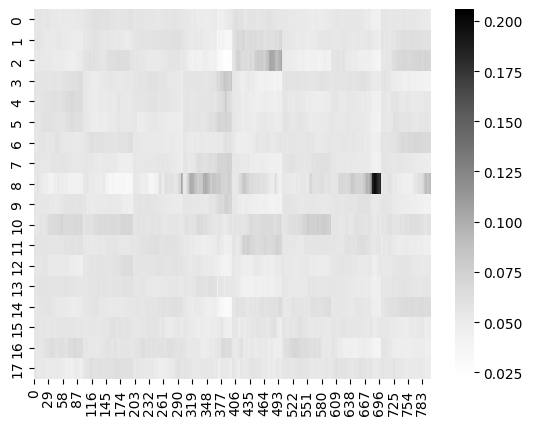

In [4]:
sns.heatmap(mpt_weights.T, cmap="Greys", )

In [5]:
return_false = pd.read_csv("../Data/TestPredictions/RL_weights_Return_esg_False.csv")
return_true = pd.read_csv("../Data/TestPredictions/RL_weights_Return_esg_True.csv")
sharpe_true = pd.read_csv("../Data/TestPredictions/RL_weights_Sharpe_esg_True.csv")
sharpe_false = pd.read_csv("../Data/TestPredictions/RL_weights_Sharpe_esg_False.csv")
sortino_true = pd.read_csv("../Data/TestPredictions/RL_weights_Sortino_esg_True.csv")
sortino_false = pd.read_csv("../Data/TestPredictions/RL_weights_Sortino_esg_False.csv")
sterling_true = pd.read_csv("../Data/TestPredictions/RL_weights_Sterling_esg_True.csv")
sterling_false = pd.read_csv("../Data/TestPredictions/RL_weights_Sterling_esg_False.csv")

In [6]:
def my_points(weights):
    r = stock_returns.iloc[8853-80:-1].reset_index(drop=True)
    w = weights.iloc[164-80:-(2)].reset_index(drop=True)
    rets = []
    risks = []
    for i in range(0,1,1): # 80
        single_period = [np.dot(w.iloc[i+j], r.iloc[i+j]) for j in range(0,800,1)] # 800
        rets.append(np.cumprod(np.array(single_period)+1)[-1]-1)
        risks.append((np.std(single_period))*np.sqrt(800))
    return [rets,risks]

    

In [7]:
alfa = my_points(return_false)
bravo  = my_points(return_true)
charlie =  my_points(sharpe_false)
delta = my_points(sharpe_true)
echo = my_points(sortino_false)
foxtrot = my_points(sortino_true)
golf = my_points(sterling_false)
hotel = my_points(sterling_true)

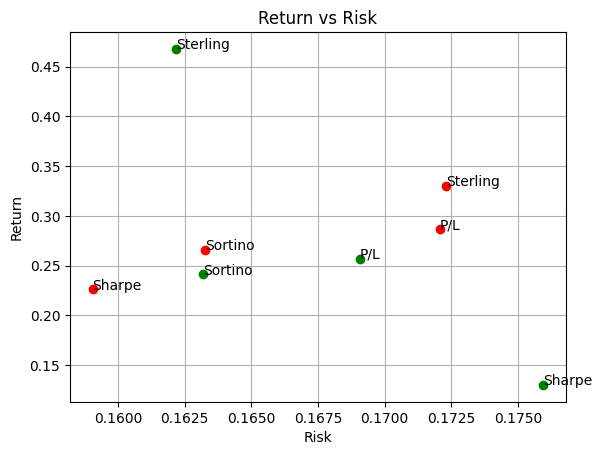

In [8]:
esg_true = [bravo, delta, foxtrot, hotel]
esg_false = [alfa, charlie,  echo, golf]
colors = ["green", "blue", "brown", "black"]
cols = ["P/L", "Sharpe", "Sortino", "Sterling"]

fig, ax = plt.subplots()
for i in range(0,4,1):
    ax.scatter(esg_true[i][1], esg_true[i][0], alpha=1, color="green")
    ax.scatter(esg_false[i][1], esg_false[i][0], alpha=1, color ="red")
    ax.text(esg_true[i][1][0], esg_true[i][0][0]+0.00001,s=cols[i])
    ax.text(esg_false[i][1][0], esg_false[i][0][0]+0.00001,s=cols[i])

plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Return vs Risk")
plt.grid()
# plt.xlim(0.0055, 0.0066)
# plt.legend()
plt.show()
# fig.tight_layout()